In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

data_x, data_y = datasets.load_svmlight_file('housing_scale.txt')
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2)
x_train = x_train.toarray()
x_test = x_test.toarray()

# loss函数：$J(\theta)=\frac{1}{2m}\sum_{i=0}^m (h(x^i)-y^i)^2$
# 梯度：$G(\theta_j) = \frac{1}{m}\sum_{i=0}^m ((h(x^i)-y^i)*x_j^i)$

In [2]:
#计算训练集的行数
train_array_row_size, = y_train.shape
test_array_row_size, = y_test.shape
#生成一个行数=train_array_row_size的全1向量
temp_vector = np.ones(train_array_row_size)
#算出X
X_train = np.column_stack((x_train,temp_vector))
temp_vector = np.ones(test_array_row_size)
X_test = np.column_stack((x_test,temp_vector))
#初始化学习率
learnRate = 0.0001

In [3]:
def computeLoss_train():
    loss_train = (1 / 2 / train_array_row_size)*np.dot(np.transpose((np.transpose(y_train) - np.dot(X_train, w))),(y_train - np.dot(X_train, w)))
    return loss_train

In [4]:
def computeLoss_test():
    loss_test = (1 / 2 / test_array_row_size)*np.dot(np.transpose((np.transpose(y_test) - np.dot(X_test, w))),(y_test - np.dot(X_test, w)))
    return loss_test

In [5]:
def computeGradient_train():
    temp = random.randint(0,train_array_row_size-1)
    pred_y = np.dot(X_train,w)[temp]
    for i in range (14):
        w[i] = w[i] - learnRate * (pred_y - y_train[temp]) * X_train[temp][i]

In [6]:
def computeGradient_test():
    temp = random.randint(0,test_array_row_size-1)
    pred_y = np.dot(X_test,w)[temp]
    for i in range (14):
        w[i] = w[i] - learnRate * (pred_y - y_test[temp]) * X_test[temp][i]

In [7]:
#初始化w
w = np.zeros(14)
train_loss_tuple = []
loss_train1 = 0
for i in range (10000):
    computeGradient_train()
    loss_train1 = computeLoss_train()
    train_loss_tuple.append(computeLoss_train())

In [8]:
#初始化w
w = np.zeros(14)
test_loss_tuple = []
loss_val = 0
for i in range (10000):
    computeGradient_test()
    loss_val = computeLoss_test()
    test_loss_tuple.append(computeLoss_test())

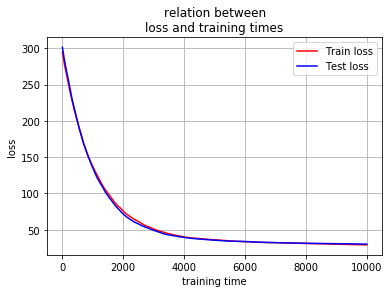

loss_train =  29.11080105299873
loss_val =  30.230531139890644


In [9]:
plt.title('relation between\nloss and training times')
plt.xlabel('training time')
plt.ylabel('loss')
plt.plot(train_loss_tuple,label= "Train loss",color = 'red')
plt.plot(test_loss_tuple,label= "Test loss",color = 'blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()
print('loss_train = ',loss_train1)
print('loss_val = ',loss_val)